# 붗꽃 데이터 (다항분류)

3 종류의 붗꽃 데이터를 사용해서 여러개의 예측 값을 갖는 다항 분류 문제.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [5]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

코랩 업로드

```python
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = '../data/datafile.csv'
```

# iris dataset

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


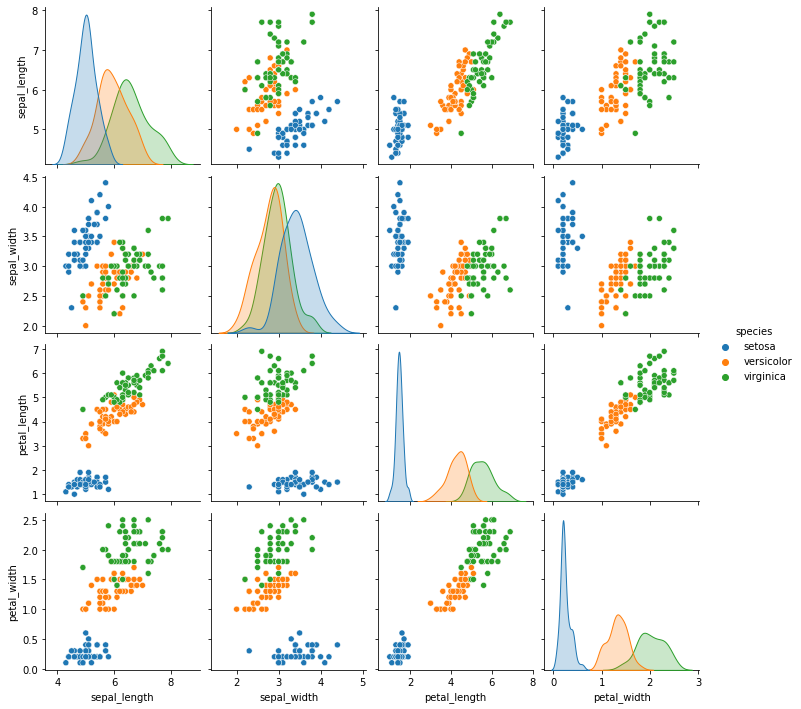

In [7]:
# 그래프로 확인
sns.pairplot(df, hue='species');
plt.show()

그래프는 데이터는 3가지 종류의 데이터가 서로 다른 크기를 가진 것을 알려준다.

In [8]:
X = df.drop('species', axis=1)
y = df['species']

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [2]:
# 데이터 분류
# dataset = df.values
# X = dataset[:,0:4].astype(float)
# Y_obj = dataset[:,4]

### 원-핫 인코딩

species 항목에 문자로 3가지 종류로 분류되고 있다. 종의 클래스 이름을 숫자로 변환하는 라벨인코더를 사용한다. 

In [12]:
# 문자열을 숫자로 변환
enc = LabelEncoder()
enc.fit(y)

LabelEncoder()

그리고 라벨로 분리된 여러 분류 값을 하나의 배열로 표시해주는 원-핫 인코딩을 한다.

In [18]:
y_encoded = enc.transform(y)
y_encoded = tf.keras.utils.to_categorical(y_encoded)

## 모델 학습

손실함수는 다항 분류 문제이므로 categorical_crossentropy 를 사용했다.

In [19]:
# 모델의 설정
model = Sequential()
model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                80        
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 모델 실행
history = model.fit(X, y_encoded, epochs=50, batch_size=1, validation_split=0.25)
# history = model.fit(X, y_encoded, epochs=50, batch_size=5, validation_split=0.25)

Epoch 1/50
112/112 [==============================] - 1s 7ms/step - loss: 0.0463 - accuracy: 0.9821 - val_loss: 0.6315 - val_accuracy: 0.6579
Epoch 2/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0482 - accuracy: 0.9911 - val_loss: 0.3808 - val_accuracy: 0.8158
Epoch 3/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0471 - accuracy: 0.9821 - val_loss: 0.5203 - val_accuracy: 0.7105
Epoch 4/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0473 - accuracy: 0.9821 - val_loss: 0.5405 - val_accuracy: 0.7105
Epoch 5/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0467 - accuracy: 0.9821 - val_loss: 0.4547 - val_accuracy: 0.7895
Epoch 6/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0480 - accuracy: 0.9821 - val_loss: 0.2598 - val_accuracy: 0.8684
Epoch 7/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0435 - accuracy: 0.9821 - val_loss: 0.3971 - val_accuracy: 0.7895
Epoch 

최종 정확도가 98% 정도 나오는데 150개 샘플을 하나씩 훈련해서 147개의 품종을 맞추는 결과를 얻는다.

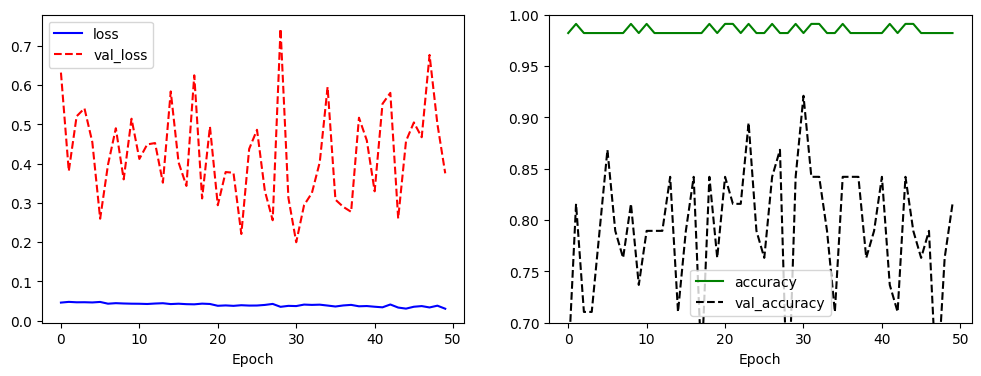

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [24]:
# 분류 모델 평가
model.evaluate(X, y_encoded)

5/5 [==============================] - 0s 6ms/step - loss: 0.1165 - accuracy: 0.9400


[0.11648707091808319, 0.9399999976158142]

In [23]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, y_encoded)[1]))

5/5 [==============================] - 0s 6ms/step - loss: 0.1165 - accuracy: 0.9400

 Accuracy: 0.9400
